# Fandango Ratings Analysis!!

The project is about analysing the movie ratings provided on Fandango site.

As per Hickey's analysis , there was significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. 
He was able to find that:

The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.

In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.

For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the data!

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np

In [36]:
fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Lets isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

In [37]:
fandango_before = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_after =  movie_ratings_16_17[['movie', 'year', 'fandango']]                                            

In [7]:
print(fandango_before.shape)
print(fandango_after.shape)

(146, 5)
(214, 3)


Since our goal is to determine whether there has been any change in in Fandango’s rating system after Hickey’s analysis; population of interest is all the movie ratings on Fandango website.

Because we want to find out whether the parameters of this population changed after Hickey’s analysis, we’re interested in sampling the population at two different periods in time — previous and after Hickey’s analysis — so we can compare the two states.

The data we’re working with was sampled at the time periods we wanted: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative of the population, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

By reading https://github.com/fivethirtyeight/data/tree/master/fandango the file we can say -
All the movies from Walt Hickey´s sample had to meet certain conditions to be chosen – they had to have at least 30 votes and also cinema tickets on sales in 2015.
These two conditions by themselves are enough to conclude that the sampling was not random because not every film had equal chance to be chosen – some of them didn´t have any chance at all (especially those with < 30 votes.

By reading https://github.com/mircealex/Movie_ratings_2016_17 the file we can say the sample  taken under certain restrictions. For example, all the movies in the sample must have been released in 2016 and they also must have had considerable number of votes.

Since both samples tend to prefer movies with high numbers of votes, we can say that the analysis will be only relevant to popular movies. We will keep the number 30 as a baseline to determine which movie is popular and which is not.

However, the second dataset does not say anything about the number of votes so we can´t check if all the movies have over 30 votes.

What we can do is to perform SRS (simple random sampling) on the list of movies here, pick say 10 of them and then check the number of votes manually on the internet.

In [38]:
sample = fandango_after.sample(n=10, random_state = 1)

In [39]:
sample

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of Feb 2020, these are the fan ratings we found:

Movie	Fan ratings
Mechanic: Resurrection	25,593 votes
Warcraft	31,481 votes
Max Steel	6,819 votes
Me Before You	30,571 votes
Fantastic Beasts and Where to Find Them	87,684 votes
Cell	3,790 votes
Genius	297 votes
Sully	48,383 votes
A Hologram for the King	10,199 votes
Captain America: Civil War	179,252 votes

These movies have votes above 30 and can be taken further for more analysis

## Changing goal of our analysis

Lets check the dataset more for further analysis -

In [10]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [11]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [40]:
fandango_before.FILM.str.extract('(\d\d\d\d)').value_counts(normalize = True) * 100 

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



2015    88.356164
2014    11.643836
Name: FILM, dtype: float64

We can see here over 88% of data is from 2015 while over 11% from 2014.

In [41]:
fandango_after.year.value_counts(normalize = True)* 100

2016    89.252336
2017    10.747664
Name: year, dtype: float64

We see a similar pattern here where 2016 has 89% of the movies and 2017 has only about 11%.

From both data set we can see we have very few data from year 2014 and 2017.
Therefore we will focus our analysis more on data in year 2015 and 2016.

Let’s start with Hickey’s data set and isolate only the movies released in 2015.

In [42]:
#Extracting Year
fandango_before['Year'] = fandango_before.FILM.str.extract('(\d\d\d\d)').astype(int)
fandango_before.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [43]:
#Extracting data of year 2015
fandango_2015 = fandango_before[fandango_before['Year'] == 2015].copy()
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [23]:
fandango_before.Year.value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [ ]:
fandango_2015.Year.value_counts()

So we were able to isolate data of 2015.

In [44]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016.year.value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution shapes for 2015 and 2016!!

Our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.
We  can do this by making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x7f341df91438>,
 <a list of 11 Text xticklabel objects>)

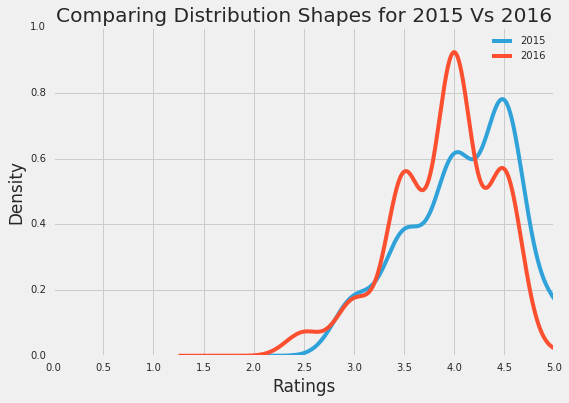

In [46]:
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title('Comparing Distribution Shapes for 2015 Vs 2016')
plt.xlabel('Ratings')
plt.xlim(0,5)
plt.xticks(np.arange(0, 5.1, 0.5))

We can see these two facts right away:

1) Both distributions are strongly negatively skewed

2) The 2016 distribution is slightly shifted to the left

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings.
The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango’s ratings for popular movies in 2015 and Fandango’s ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies!!

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

In [47]:
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [48]:
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can see here that - there wasn't rating 2.5 in 2015 means was the min rating and most of the ratings are 4.5stars while in 2016 most of ratings are of 4 stars and min rating seems to be is 3 stars.


## Determining the Direction of Change !!

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [49]:
#Mean of each dist
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

#Median of each dist
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

#Mode of each dist
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


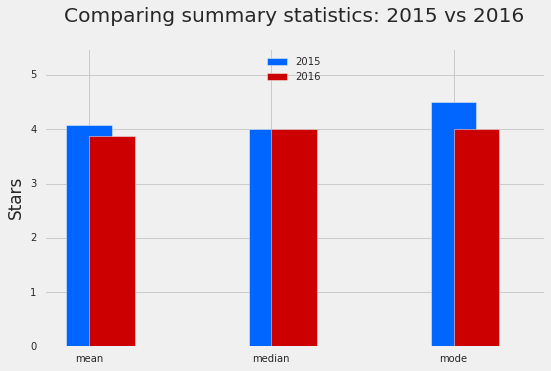

In [53]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color="#0066FF", align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color="#CC0000",align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean decreased by 0.2 which is about 5% change. The median remained the same and the mode also decreased by 0.5 (11% decrease).
The summary statistics confirms that the movies were in aggregate indeed rated lower in 2016 compared to the values from 2015.
Even though the numbers show that there has been a decreasing trend in rating, we can´t be 100% sure about the cause. Maybe the movies released in 2016 were a lot worse than those in 2015. It is also possible that Fandango fixed the bug as they said they would.